# TP1: LU vs Cholesky

Nome:

Matrícula:

**Ao submeter este trabalho prático, eu, aluno, declaro que aceito a seguinte política de honestidade com relação ao plágio: "O aluno que submeter soluções com mais que 40% das linhas similares a outra submissão ficará com zero neste trabalho prático. As soluções enviadas também serão comparadas com sumissões de semestres anteriores.**

* Data de entrega: até 23:55 do dia 09/09/2018

* As questões não podem ser discutidas entre os alunos em hipótese alguma. Dúvidas devem ser tiradas com os monitores ou com o professor.

* Todo material consultado na Internet deve ser referenciado (incluir URL).

* Submissão deve ser feita em formato de ipython notebook (extensão .ipynb) através do Moodle.


Este trabalho está dividido em cinco partes:
 * **Parte 0**: Apresentação da implementação da Decomposição LU
 * **Parte 1**: Implementação da Decomposição LU com pivotação parcial
 * **Parte 2**: Implementação da Decomposição de Cholesky
 * **Parte 3**: Comparação do tempo de execução LU vs. Cholesky e geração de gráfico

## Parte 0: Apresentação da Decomposição LU

Na aula do dia 23/08 vimos que a decomposição $A = LU$ consiste em decompor uma matriz $A$ no produto de uma matriz triangular inferior $L$ por uma matriz triangular superior $U$. Em particular, observamos que os multiplicadores da eliminação de Gauss são utilizados para "preencher" a matriz $L$.

**Por simplicidade, vamos assumir que todas as matrizes são quadradas.**

A implementação da decomposição LU é apresentada abaixo.

In [1]:
import numpy as np
def LU(A):
    U = np.copy(A)
    m, n = A.shape
    L = np.zeros((n,n))
    for k in range(n-1):
        for j in range(k+1,n):
            L[j,k] = U[j,k]/U[k,k]
            U[j,k:n] -= L[j,k] * U[k,k:n]
    L = L + np.eye(n)
    return L, U

A solução de um sistema do tipo $Ax=b$ a partir da decomposição LU de $A$ é realizada em duas etapas.
* Etapa 1: solução do sistema triangular $Ly=b$
* Etapa 2: solução do sistema triangular $Ux=y$.

O exemplo a seguir mostra a construção de uma matriz $A$ $n \times n$, um vetor $b$ de tamanho $n$ e a solução do sistema $Ax=b$ usando a função LU definida anteriormente.

In [2]:
from scipy.linalg import solve_triangular
 
n = 3
A = np.random.random((n,n))
b = np.random.random(n)
print('A =',A)
print('b =',b)

L, U = LU(A)
y = solve_triangular(L,b)
x = solve_triangular(U,y)
print('x =',x)

A = [[0.97193249 0.84856803 0.11086722]
 [0.85943158 0.11029809 0.28734887]
 [0.81937767 0.66872445 0.24645304]]
b = [0.85552158 0.94275264 0.62846045]
x = [ 0.4851796  -0.13743655  4.51516703]


Um dos problemas da decomposição LU sem pivotação é a possibilidade de ocorrerem divisões por zero. Ainda que elas não ocorram, a pivotação parcial traz maior estabilidade numérica (reduz erros de arredondamento intrínsecos à precisão finita) ao dividir sempre por números de grande magnitude.

## Parte 1: Implementação da Decomposição LU com pivotação parcial

Na pivotação parcial, ao invés de escolhermos sempre os elementos da diagonal como pivô, iremos escolher o elemento, da diagonal para baixo, que tiver o maior valor absoluto.

Em sala, vimos como manter um vetor $p$ indicando as permutações de linhas efetuadas durante a pivotação parcial. Desta vez, iremos realmente permutar as linhas da matriz $U$ (cópia de $A$) de lugar.

**1.1** Escreva uma função troca(a,b) que troca o conteúdo de dois numpy arrays a e b. Ela não deve retornar nada.

In [3]:
def troca(a,b):


In [4]:
# exemplo de uso
u = np.array([1,2,3])
v = np.array([4,5,6])
troca(u,v)

print('u', u)
print('v', v)

u [4 5 6]
v [1 2 3]


**1.2** Implemente a função encontraIndicePivo(v) que retorna o índice do elemento de maior valor absoluto dado um numpy array $v$. Se quiser, você pode usar uma função do numpy para resolver esta questão.

In [5]:
def encontraIndicePivo(v):


In [6]:
# exemplo de uso
a = np.array([1,-2,3])
b = np.array([1,-4,3])

print(encontraIndicePivo(a))
print(encontraIndicePivo(b))

2
1


**1.3** Usando a função LU da Parte 0 como base, mostre como usar as funções que você criou para implementar a decomposição $PA=LU$. A função LUPivot(A) deve retornar L, U e a matriz de permutação P.

*Dica 1:* Note que o índice do pivô na $k$-ésima iteração não é simplesmente encontraIndicePivo(U[k:,k]).

*Dica 2*: Após encontrar o pivô, você deve trocar as linhas correspondentes em L, U e P.

In [7]:
def LUPivot(A):

    return L, U, P

In [8]:
# exemplo de uso
A = np.array([[4,-1,0,-1],[1,-2,1,0],[0,4,-4,1],[5,0,5,-1]]).astype(np.float)
L,U,P = LUPivot(A)
print('L=',L)
print('U=',U)
print('P=',P)

L= [[ 1.    0.    0.    0.  ]
 [ 0.    1.    0.    0.  ]
 [ 0.8  -0.25  1.    0.  ]
 [ 0.2  -0.5   0.4   1.  ]]
U= [[ 5.    0.    5.   -1.  ]
 [ 0.    4.   -4.    1.  ]
 [ 0.    0.   -5.    0.05]
 [ 0.    0.    0.    0.68]]
P= [[0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]]


## Parte 2: Implementação da Decomposição de Cholesky

Na aula do dia 25/08 vimos que matrizes simétricas definidas positivas (DP) admitem uma decomposição $A = LL^\top$ onde $L$ é uma matriz triangular inferior de números reais. Em particular, vimos que o seu custo é aproximadamente metade da decomposição LU.

**Por simplicidade, vamos gerar matrizes simétricas definidas positivas a partir daqui.**

Abaixo ilustramos a geração de uma matriz $A$ $n \times n$ simétrica definida positiva.

In [9]:
n,m = 3,4
X = np.random.random((n,m))
A = X @ X.T
print('A=',A)

autoval, autovec = np.linalg.eig(A)
print('autovalores de A:',autoval)

A= [[1.96904545 1.25879631 1.23543335]
 [1.25879631 1.48451423 1.4986055 ]
 [1.23543335 1.4986055  1.80861347]]
autovalores de A: [4.41972483 0.71832874 0.12411957]


**2.1** Implemente a função Cholesky(A) que recebe uma matriz definida positiva A e retorna a matriz $L$. Abaixo importamos a função sqrt da biblioteca math.

In [10]:
from math import sqrt
import numpy as np
 
def Cholesky(A):

    return L

In [11]:
# exemplo de uso

L = Cholesky(A)
print('L=',L)
np.allclose(L@L.T,A)

L= [[1.4032268  0.         0.        ]
 [0.89707259 0.82448468 0.        ]
 [0.88042315 0.85969096 0.5425864 ]]


True

**2.2** Implemente a função resolveCholesky(L,b) que dada a matriz L encontra a solução do sistema $Ax=b$ para uma matriz $A = L L^\top$ simétrica definida positiva.

In [12]:
def resolveCholesky(L,b):

    return x

In [13]:
# exemplo de uso

b = np.random.random(3)
x = resolveCholesky(L,b)
print('x=',x)

x= [-0.12344248 -1.92364853  2.30708921]


## Parte 3: Comparação do tempo de execução LU vs. Cholesky e geração de gráfico

Nesta parte, iremos comparar o tempo de execução das nossas implementações LU (Parte 0) e Cholesky (Parte 2) para matrizes DPs de diferentes tamanhos. Note que Python não é uma linguagem compilada e, portanto, as nossas implementações serão bem mais lentas que as implementações disponíveis na biblioteca scipy.

Para medir o tempo de execução usaremos um <a href="https://ipython.readthedocs.io/en/stable/interactive/magics.html">comando mágico</a> chamado %timeit.

No exemplo abaixo, executamos o comando

    L, U = LU(A)

em 3 loops consecutivos de 5 iterações cada. Apenas o loop mais rápido é levado em consideração. A opção -q evita que o resultado seja impresso no output. A opção -o salva o resultado em uma variável. Esta variável possui um atribute average, que é o que nos interessa.

In [14]:
time_info = %timeit -r 3 -n 5 -q -o L,U = LU(A)
print('O tempo medio de LU foi',time_info.average,'segundos')

O tempo medio de LU foi 3.1843067457278566e-05 segundos


**3.1** A seguir, implemente o código que irá salvar os resultados dos tempos de execução de LU e Cholesky para matrizes quadradas $A$ de ordem $n=2^8,2^9,2^{10},2^{11},2^{12}$. Note que as matrizes devem ser simétricas e DP para que possam ser decompostas por ambos os métodos.

In [15]:
expoentes = np.arange(8,12)
tempos_LU = np.zeros(len(expoentes))
tempos_Chol = np.zeros(len(expoentes))

for expoente in expoentes:


**3.2** Usando a biblioteca matplotlib, gere um gráfico comparando os dois resultados. Segue um exemplo de gráfico com duas curvas para usar como referência.

/usr/local/miniconda3/envs/py3/lib/python3.6/site-packages/matplotlib/font_manager.py:278: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


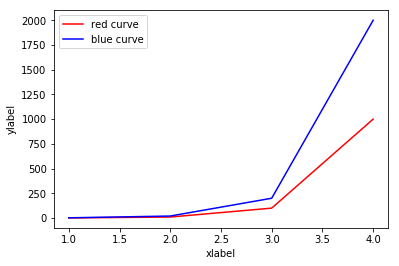

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

x = np.array([1,2,3,4])
y1= np.array([1,10,100,1000])
y2= np.array([2,20,200,2000])

plt.plot(x,y1,'r-',label='red curve')
plt.plot(x,y2,'b-',label='blue curve')
plt.xlabel('xlabel')
plt.ylabel('ylabel')
# tente descomentar a linha abaixo
#plt.yscale('log')
plt.legend()